In [1]:
# Import basic packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
data = pd.read_csv('IMDB_Dataset.csv')

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.shape

(50000, 2)

In [6]:
print(data['review'][3])

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.


In [7]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
print(data.columns)


Index(['review', 'sentiment'], dtype='object')


In [9]:
data['length'] = data['review'].apply(len)
data['length']

0        1761
1         998
2         926
3         748
4        1317
         ... 
49995    1008
49996     642
49997    1280
49998    1234
49999     678
Name: length, Length: 50000, dtype: int64

<AxesSubplot:ylabel='Frequency'>

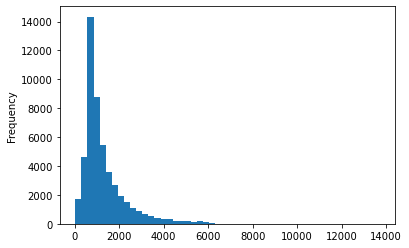

In [10]:
data['length'].plot(bins = 50, kind = 'hist')

(array([1.7220e+03, 4.5940e+03, 1.4335e+04, 8.7970e+03, 5.4350e+03,
        3.5950e+03, 2.6630e+03, 1.9530e+03, 1.5400e+03, 1.0940e+03,
        8.9200e+02, 7.0200e+02, 5.7000e+02, 4.2000e+02, 3.3700e+02,
        3.0000e+02, 2.2300e+02, 1.9500e+02, 1.6300e+02, 1.5200e+02,
        1.6000e+02, 1.0300e+02, 2.3000e+01, 5.0000e+00, 2.0000e+00,
        5.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   32.  ,   305.44,   578.88,   852.32,  1125.76,  1399.2 ,
         1672.64,  1946.08,  2219.52,  2492.96,  2766.4 ,  3039.84,
         3313.28,  3586.72,  3860.16,  4133.6 ,  4407.04,  4680.48,
         4953.92,  5227.36,  5500.8 ,  5774.24,  6047.68,  6321.12,
         6594.56,  6868.  ,  7141.44,  7414.88

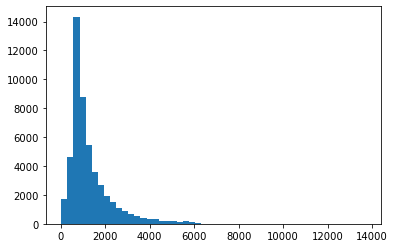

In [11]:
plt.hist(data['length'],bins = 50, )

<AxesSubplot:ylabel='Density'>

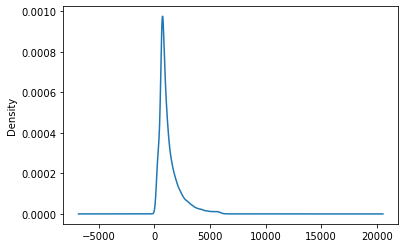

In [12]:
data['length'].plot(kind = 'kde')

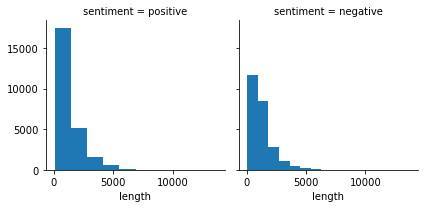

In [13]:
g = sns.FacetGrid(data, col='sentiment')
g.map(plt.hist, 'length')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

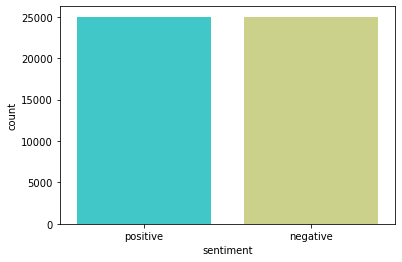

In [14]:
sns.countplot(x = 'sentiment', data = data, palette='rainbow')

<AxesSubplot:xlabel='sentiment', ylabel='length'>

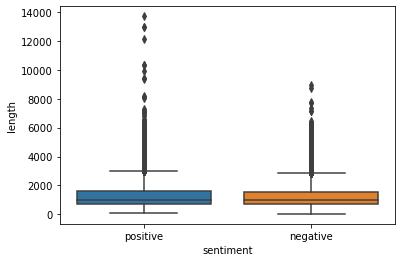

In [15]:
sns.boxplot(x = data['sentiment'], y = data['length'])

In [16]:
sentiments = data.groupby(by = 'sentiment').mean()
sentiments

,length
sentiment,
negative,1294.06436
positive,1324.79768


In [17]:
sentiments.corr()

,length
length,1.0


<AxesSubplot:>

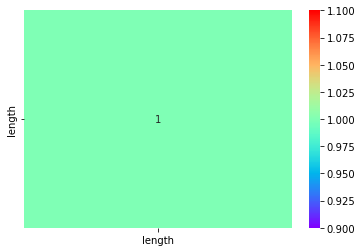

In [18]:
sns.heatmap(sentiments.corr(), annot=True, cmap = 'rainbow')

In [19]:
data['length'].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: length, dtype: float64

In [20]:
filtered_data = data[data['length'] >= 5000]
text_value = filtered_data['review']

In [21]:
# Only take the relevant columns
X = data['review']
y = data['sentiment']


# TEXT Preprocessing

In [22]:
import string

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
print(X)

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


In [25]:
first_review = X.iloc[0]
first_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [26]:
nopunc = [char for char in first_review if char not in string.punctuation]
nopunc = ''.join(nopunc)
nopunc

'One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with mebr br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordbr br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br I would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Fo

In [27]:
print(len(nopunc.split()))
print(nopunc.split())

307
['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', 'youll', 'be', 'hooked', 'They', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'mebr', 'br', 'The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO', 'Trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'This', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'Its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'wordbr', 'br', 'It', 'is', 'called', 'OZ', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', 'It', 'focuses', 'mainly', 'on', 'Emerald', 'City', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
clean_review = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_review

['One',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'Oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'mebr',
 'br',
 'first',
 'thing',
 'struck',
 'Oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'GO',
 'Trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordbr',
 'br',
 'called',
 'OZ',
 'nickname',
 'given',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 'Penitentary',
 'focuses',
 'mainly',
 'Emerald',
 'City',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'Em',
 'City',
 'home',
 'manyAryans',
 'Muslims',
 'gangstas',
 'Latinos',
 'Christians',
 'Italians',
 'Irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awaybr',
 'br',
 'would',
 'say',
 'main',
 'appeal',

In [30]:
# Lets make a function with all the above steps

def text_process(first_review):
    """
    Takes a string as an input and does the following,
    1. Removes all the punctuation
    2. Removes all the stopwords
    3. Returns a list of the cleaned text
    """

    nopunc = [char for char in first_review if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return (word for word in nopunc.split() if word.lower() not in stopwords.words('english'))

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002BDBD00F1F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [37]:
predictions = pipeline.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[6590  821]
 [1169 6420]]
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87      7411
    positive       0.89      0.85      0.87      7589

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [40]:
from sklearn.svm import LinearSVC

In [41]:
pipeline_svc = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LinearSVC())
])

In [ ]:
pipeline_svc.fit(X_train, y_train)

In [ ]:
predictions_svc = pipeline_svc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_svc))
print(classification_report(y_test,predictions_svc))

In [ ]:
pipeline_1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('classifier', MultinomialNB())
])

In [ ]:
pipeline_1.fit(X_train, y_train)

predictions_1 = pipeline_1.predict(X_test)

print(confusion_matrix(y_test,predictions_1))
print(classification_report(y_test,predictions_1))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import losses

In [ ]:
!pip install tensorflow-hub
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(X_train[:3])

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=1)